1. Importing necessery packeges and functions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

2. Data Loading and Preprocessing

In [3]:
# load data set
df = pd.read_csv("data/diabetes.csv")

In [4]:
# view the first few rows of the dat frame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5.897302,147.454335,70.914812,34.349127,1.883577,34.412522,0.648393,50.261729,1
1,1.101072,87.228809,67.057626,29.457914,0.000000,26.784201,0.356130,29.834140,0
2,7.939244,185.083876,66.054168,0.000000,0.000000,24.061055,0.663302,32.651592,1
3,0.855559,87.846161,66.187249,23.242126,89.726267,28.974094,0.176398,21.481908,0
4,0.000000,137.715755,39.183696,35.726182,177.446938,43.328373,2.335509,33.927286,1


In [5]:
# list all the column names of a DataFrame
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# Check data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [7]:
# Summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.851607,121.034601,69.124881,20.632400,80.865337,32.005044,0.471623,33.287770,0.348958
std,3.358411,32.133392,19.294297,15.864806,114.710197,7.872757,0.332260,11.782728,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036637,19.425593,0.000000
25%,1.042585,99.170912,62.865664,0.902628,0.000000,27.363929,0.241222,23.922459,0.000000
50%,2.975851,117.484187,71.626425,22.828627,31.852846,32.036785,0.371572,29.051297,0.000000
75%,6.061244,140.279716,79.362046,32.279551,127.675588,36.506122,0.623471,40.694005,1.000000
max,16.715548,200.031754,122.579531,100.423207,855.005651,66.980905,2.430805,80.889103,1.000000


  Handling Missing Values

In [8]:
# Check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Replace zero values with NaN and fill them with the median.

In [9]:
# Define columns that need to have zero values replaced with NaN
cols_to_replace = [
    "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace zero values with NaN
df[cols_to_replace] = df[cols_to_replace].replace(0, np.NaN)

# Impute NaN values with the median using SimpleImputer
imputer = SimpleImputer(strategy="median")
df[cols_to_replace] = imputer.fit_transform(df[cols_to_replace])

# Verify no missing values after imputation
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


 Removing Duplicates

In [11]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
duplicates

0

In [13]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Print how many duplicates were removed
print(f"Number of duplicates removed: {duplicates}")

Number of duplicates removed: 0


3. Feature Scaling and SMOTE (Class Balancing)

In [14]:
# define features (all columns except the target 'Outcome')
X = df.drop("Outcome", axis=1)

# Target variable(the outcome column)
y = df["Outcome"]

In [46]:
# Remove rows with missing target values
df_cleaned = df.dropna(subset=["Outcome"])

In [15]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(
    X_train)

# Transform the test data using the same scaler
# to avoid data leakage
X_test = scaler.transform(X_test)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(
    X_train, y_train)

# Print class distribution before and after SMOTE
print(
    f"Original class distribution in training data: {y_train.value_counts()}")
print(
    f"New class distribution after SMOTE: {y_train_res.value_counts()}")

Original class distribution in training data: Outcome
0    401
1    213
Name: count, dtype: int64
New class distribution after SMOTE: Outcome
0    401
1    401
Name: count, dtype: int64


c:\Users\abduy\anaconda3\envs\Diabetes_Classification_Experiment-env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


4. Principal Component Analysis (PCA) (dimentionality reduction )


Explained Variance Ratio of the Selected Components: [0.25897175 0.19592751 0.13859707 0.11229196 0.1060524 ]


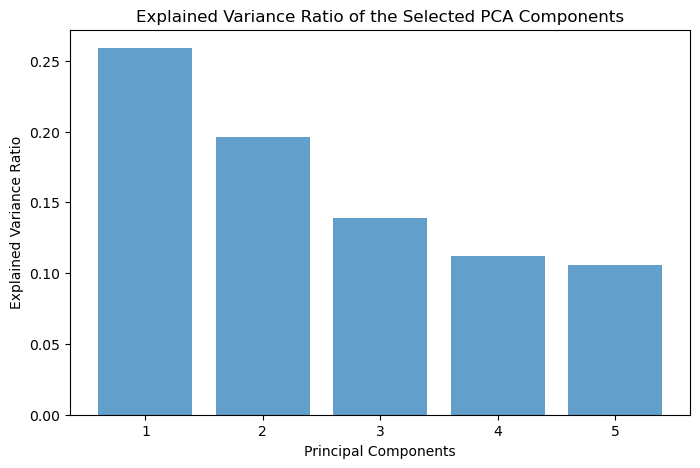

In [18]:
# Apply PCA to reduce dimensions to 5 components
pca = PCA(n_components=5)
# Fit and transform on training data
X_train_pca = pca.fit_transform(
    X_train_res)
# Transform the test data using the same components
X_test_pca = pca.transform(
    X_test)

# Print the explained variance ratio of the selected components
print(
    "\nExplained Variance Ratio of the Selected Components:",
    pca.explained_variance_ratio_,
)
# Plot the explained variance ratio for the selected components
plt.figure(figsize=(8, 5))
plt.bar(
    range(1, 6), pca.explained_variance_ratio_, alpha=0.7, align="center")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title(
    "Explained Variance Ratio of the Selected PCA Components")
plt.show()

5. Model Training and Evaluation


KNN - Cross-Validation F1 Score: 0.7970 ± 0.0424
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.79      0.66      0.72        99
           1       0.53      0.69      0.60        55

    accuracy                           0.67       154
   macro avg       0.66      0.67      0.66       154
weighted avg       0.70      0.67      0.68       154

Confusion Matrix for KNN:
[[65 34]
 [17 38]]


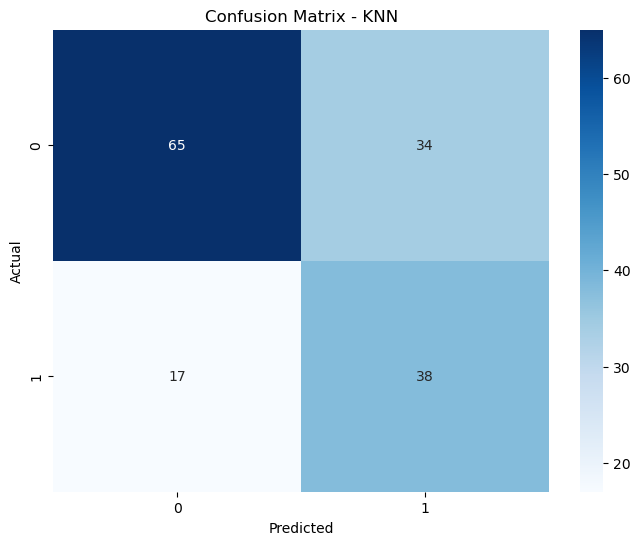


Naive Bayes - Cross-Validation F1 Score: 0.6899 ± 0.0181
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.83      0.69      0.75        99
           1       0.57      0.75      0.65        55

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.71       154

Confusion Matrix for Naive Bayes:
[[68 31]
 [14 41]]


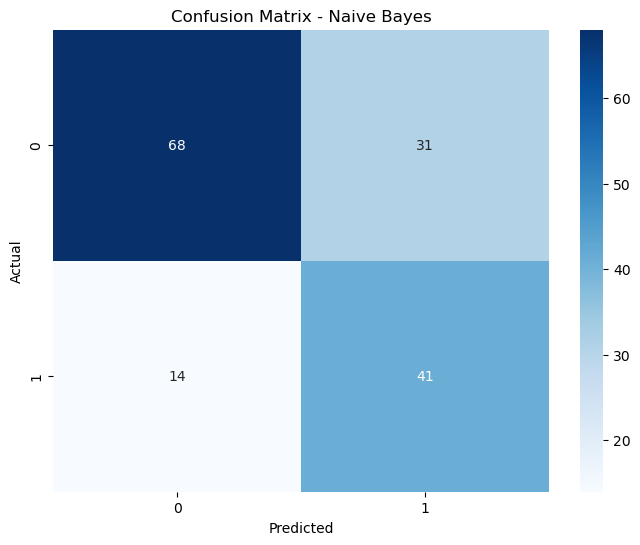


Logistic Regression - Cross-Validation F1 Score: 0.7245 ± 0.0103
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.70      0.76        99
           1       0.58      0.75      0.65        55

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.72       154

Confusion Matrix for Logistic Regression:
[[69 30]
 [14 41]]


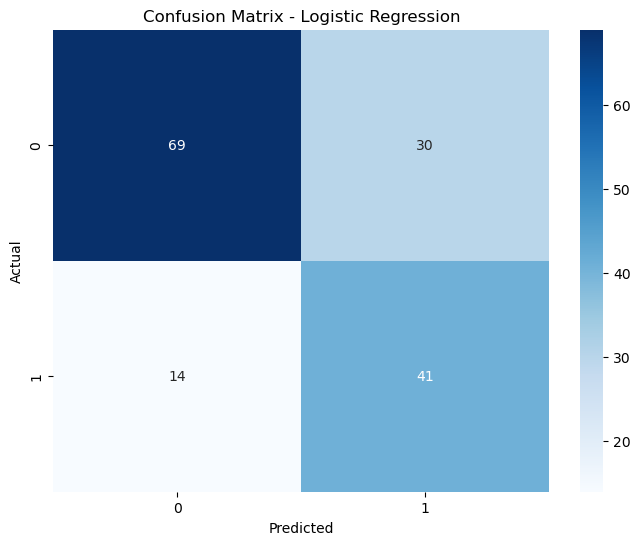


Decision Tree - Cross-Validation F1 Score: 0.7432 ± 0.0533
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.78      0.71      0.74        99
           1       0.55      0.64      0.59        55

    accuracy                           0.68       154
   macro avg       0.66      0.67      0.66       154
weighted avg       0.70      0.68      0.69       154

Confusion Matrix for Decision Tree:
[[70 29]
 [20 35]]


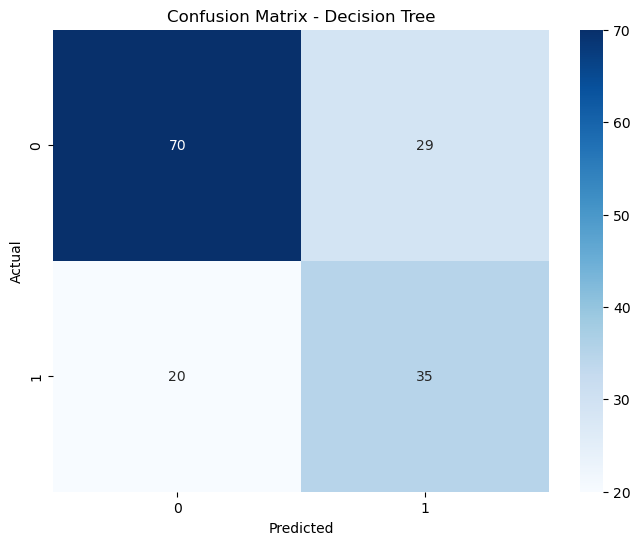


SVM - Cross-Validation F1 Score: 0.7824 ± 0.0326
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        99
           1       0.61      0.73      0.66        55

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154

Confusion Matrix for SVM:
[[73 26]
 [15 40]]


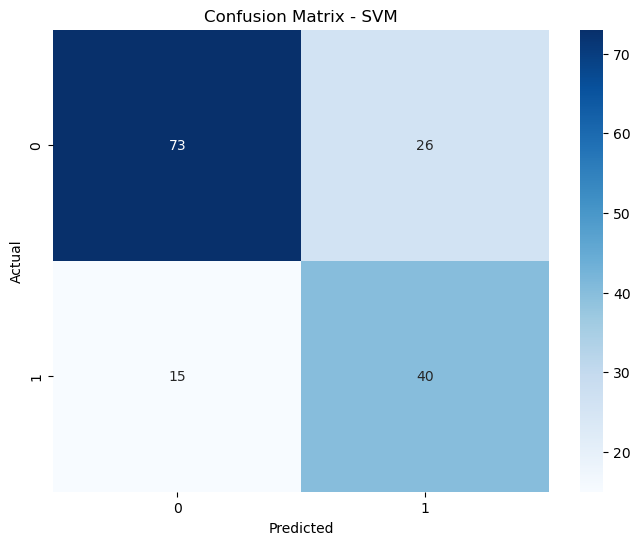


All models trained and evaluated.


In [19]:
# Define the models
models = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
}

# Train and evaluate models
for name, model in models.items():
    # Perform cross-validation and get the F1 score
    f1_scores = cross_val_score(
        model, X_train_pca, y_train_res, cv=5, scoring="f1")

    # Train the model on the full training data
    model.fit(X_train_pca, y_train_res)

    # Make predictions on the test data
    y_pred = model.predict(X_test_pca)

    # Print the F1 score (mean and standard deviation)
    print(
        f"\n{name} - Cross-Validation F1 Score: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}"
    )

    # Print classification report and confusion matrix for the test data
    print(
        f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))

    print(
        f"Confusion Matrix for {name}:")
    print(
        confusion_matrix(y_test, y_pred))

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

print("\nAll models trained and evaluated.")

6. Cross-Validation Evaluation

In [50]:
# Perform cross-validation for each model
for name, model in models.items():
    cv_scores = cross_val_score(
        model, X_train_pca, y_train_res, cv=5, scoring="f1")
    print(
        f"{name} - Cross-validation F1-score (Mean): {cv_scores.mean():.4f}")
    print(
        f"{name} - Cross-validation F1-score (Standard Deviation): {cv_scores.std():.4f}\n"
    )

KNN - Cross-validation F1-score (Mean): 0.7970
KNN - Cross-validation F1-score (Standard Deviation): 0.0424

Naive Bayes - Cross-validation F1-score (Mean): 0.6899
Naive Bayes - Cross-validation F1-score (Standard Deviation): 0.0181

Logistic Regression - Cross-validation F1-score (Mean): 0.7245
Logistic Regression - Cross-validation F1-score (Standard Deviation): 0.0103

Decision Tree - Cross-validation F1-score (Mean): 0.7403
Decision Tree - Cross-validation F1-score (Standard Deviation): 0.0537

SVM - Cross-validation F1-score (Mean): 0.7824
SVM - Cross-validation F1-score (Standard Deviation): 0.0326



4. Illustrating and Analyzing Results

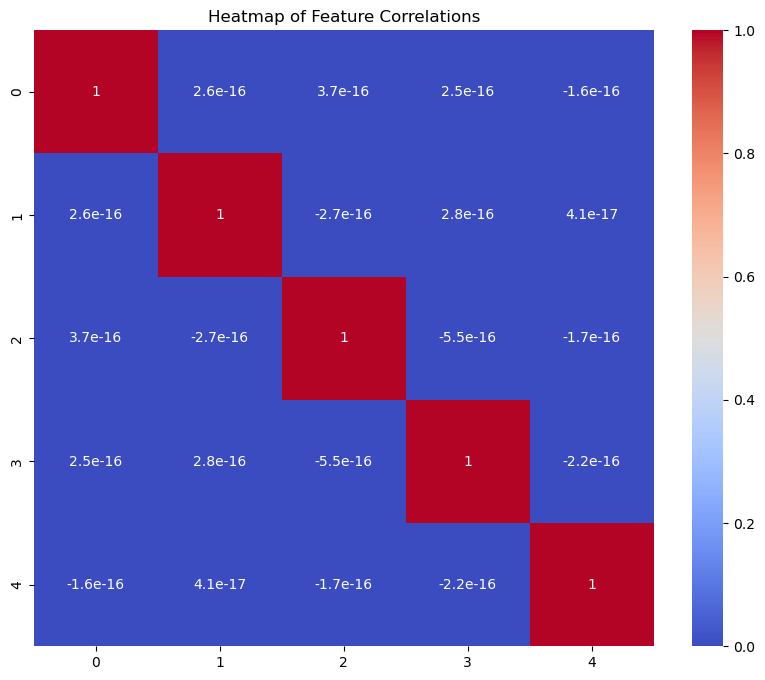

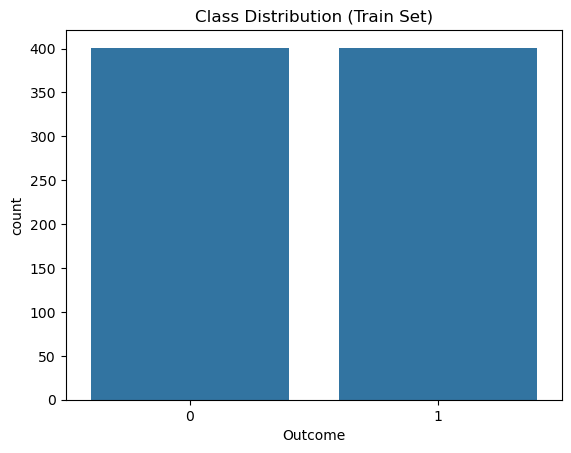

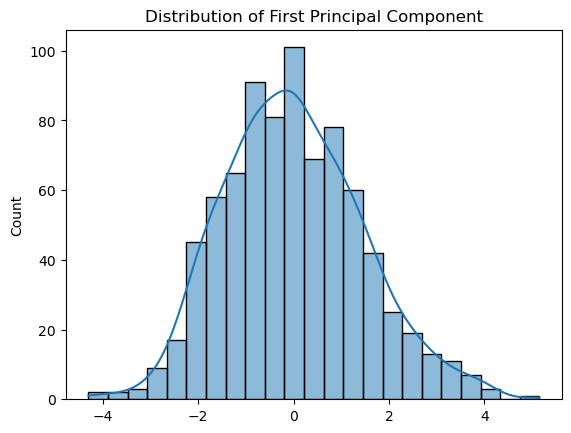

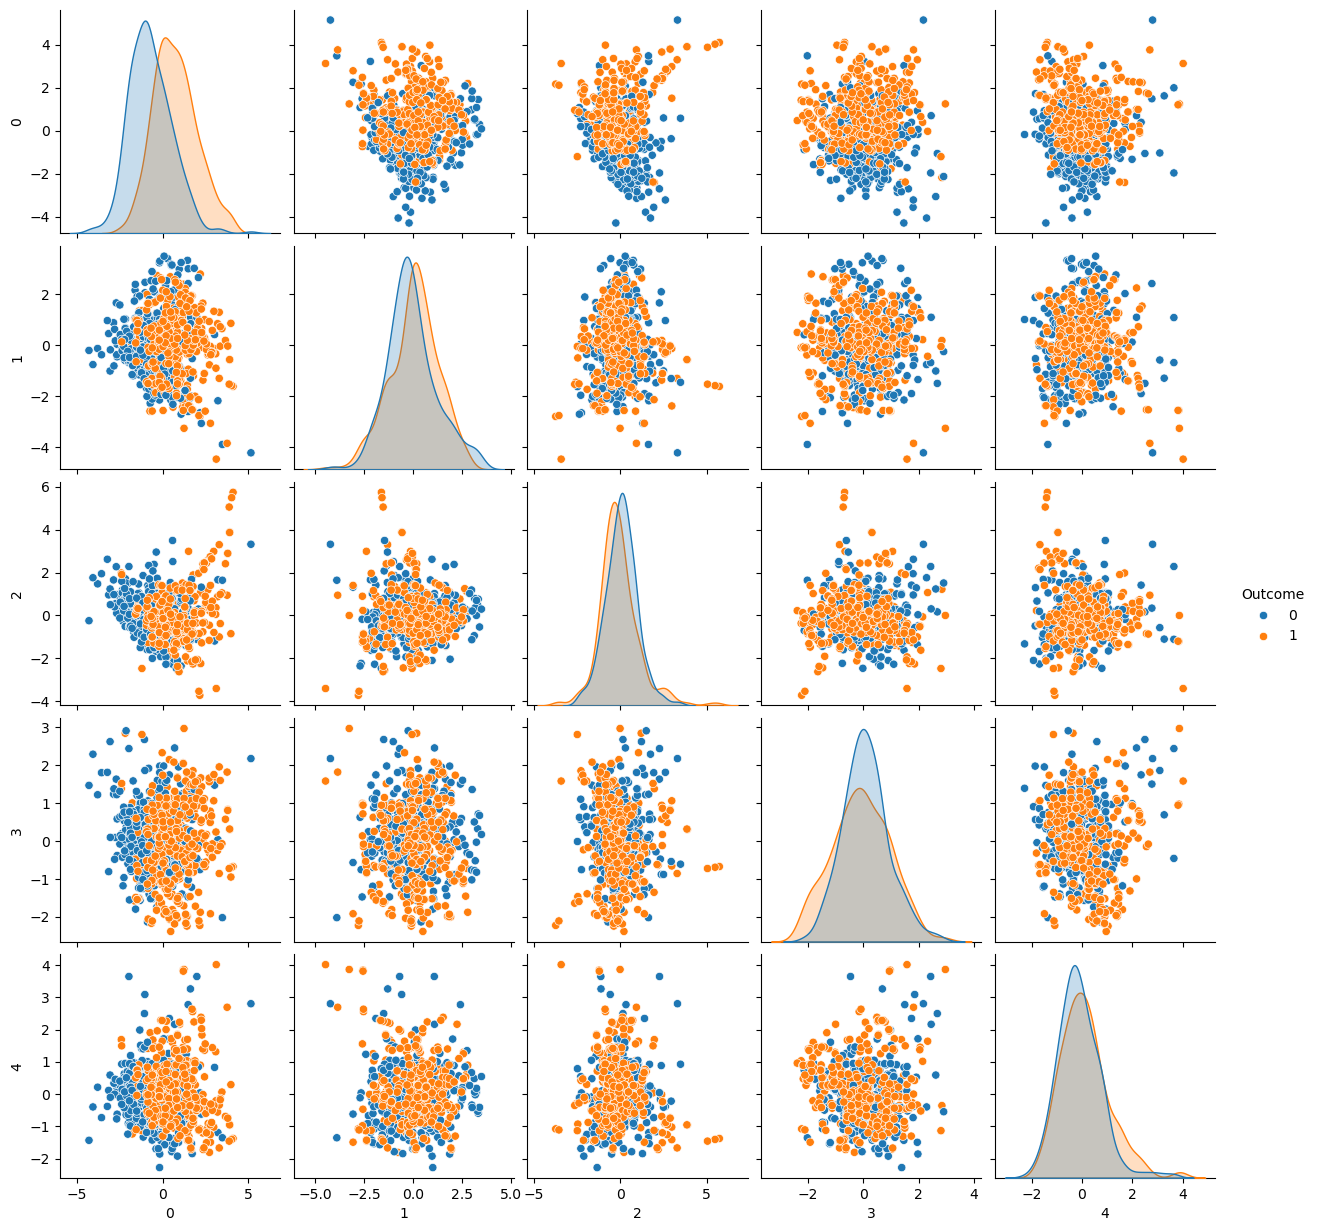

In [20]:
# 1. Heatmap of Feature Correlations
corr = pd.DataFrame(X_train_pca).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap of Feature Correlations")
plt.show()

# 2. Class Distribution Count Plot
sns.countplot(x=y_train_res)
plt.title("Class Distribution (Train Set)")
plt.show()

# 3. Histograms of Feature Distributions after PCA
sns.histplot(X_train_pca[:, 0], kde=True)
plt.title("Distribution of First Principal Component")
plt.show()

# 4. Pair Plot for Feature Relationships
# Convert y_train_res to a DataFrame and
# concatenate it with X_train_pca for the pairplot
y_train_df = pd.DataFrame(
    y_train_res, columns=["Outcome"])
X_train_pca_df = pd.DataFrame(
    X_train_pca)
pair_data = pd.concat([X_train_pca_df, y_train_df], axis=1)

# Now you can use pairplot without issues
sns.pairplot(pair_data, hue="Outcome")
plt.show()